In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
import operator
import seaborn as sn
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
import pandasql as ps
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df = pd.read_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/Adatok/TRAIN2.csv")
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Columns: 109 entries, NewName to ShotsOnTargetPerMinutesPlayed
dtypes: float64(70), int64(29), object(10)
memory usage: 9.2+ MB


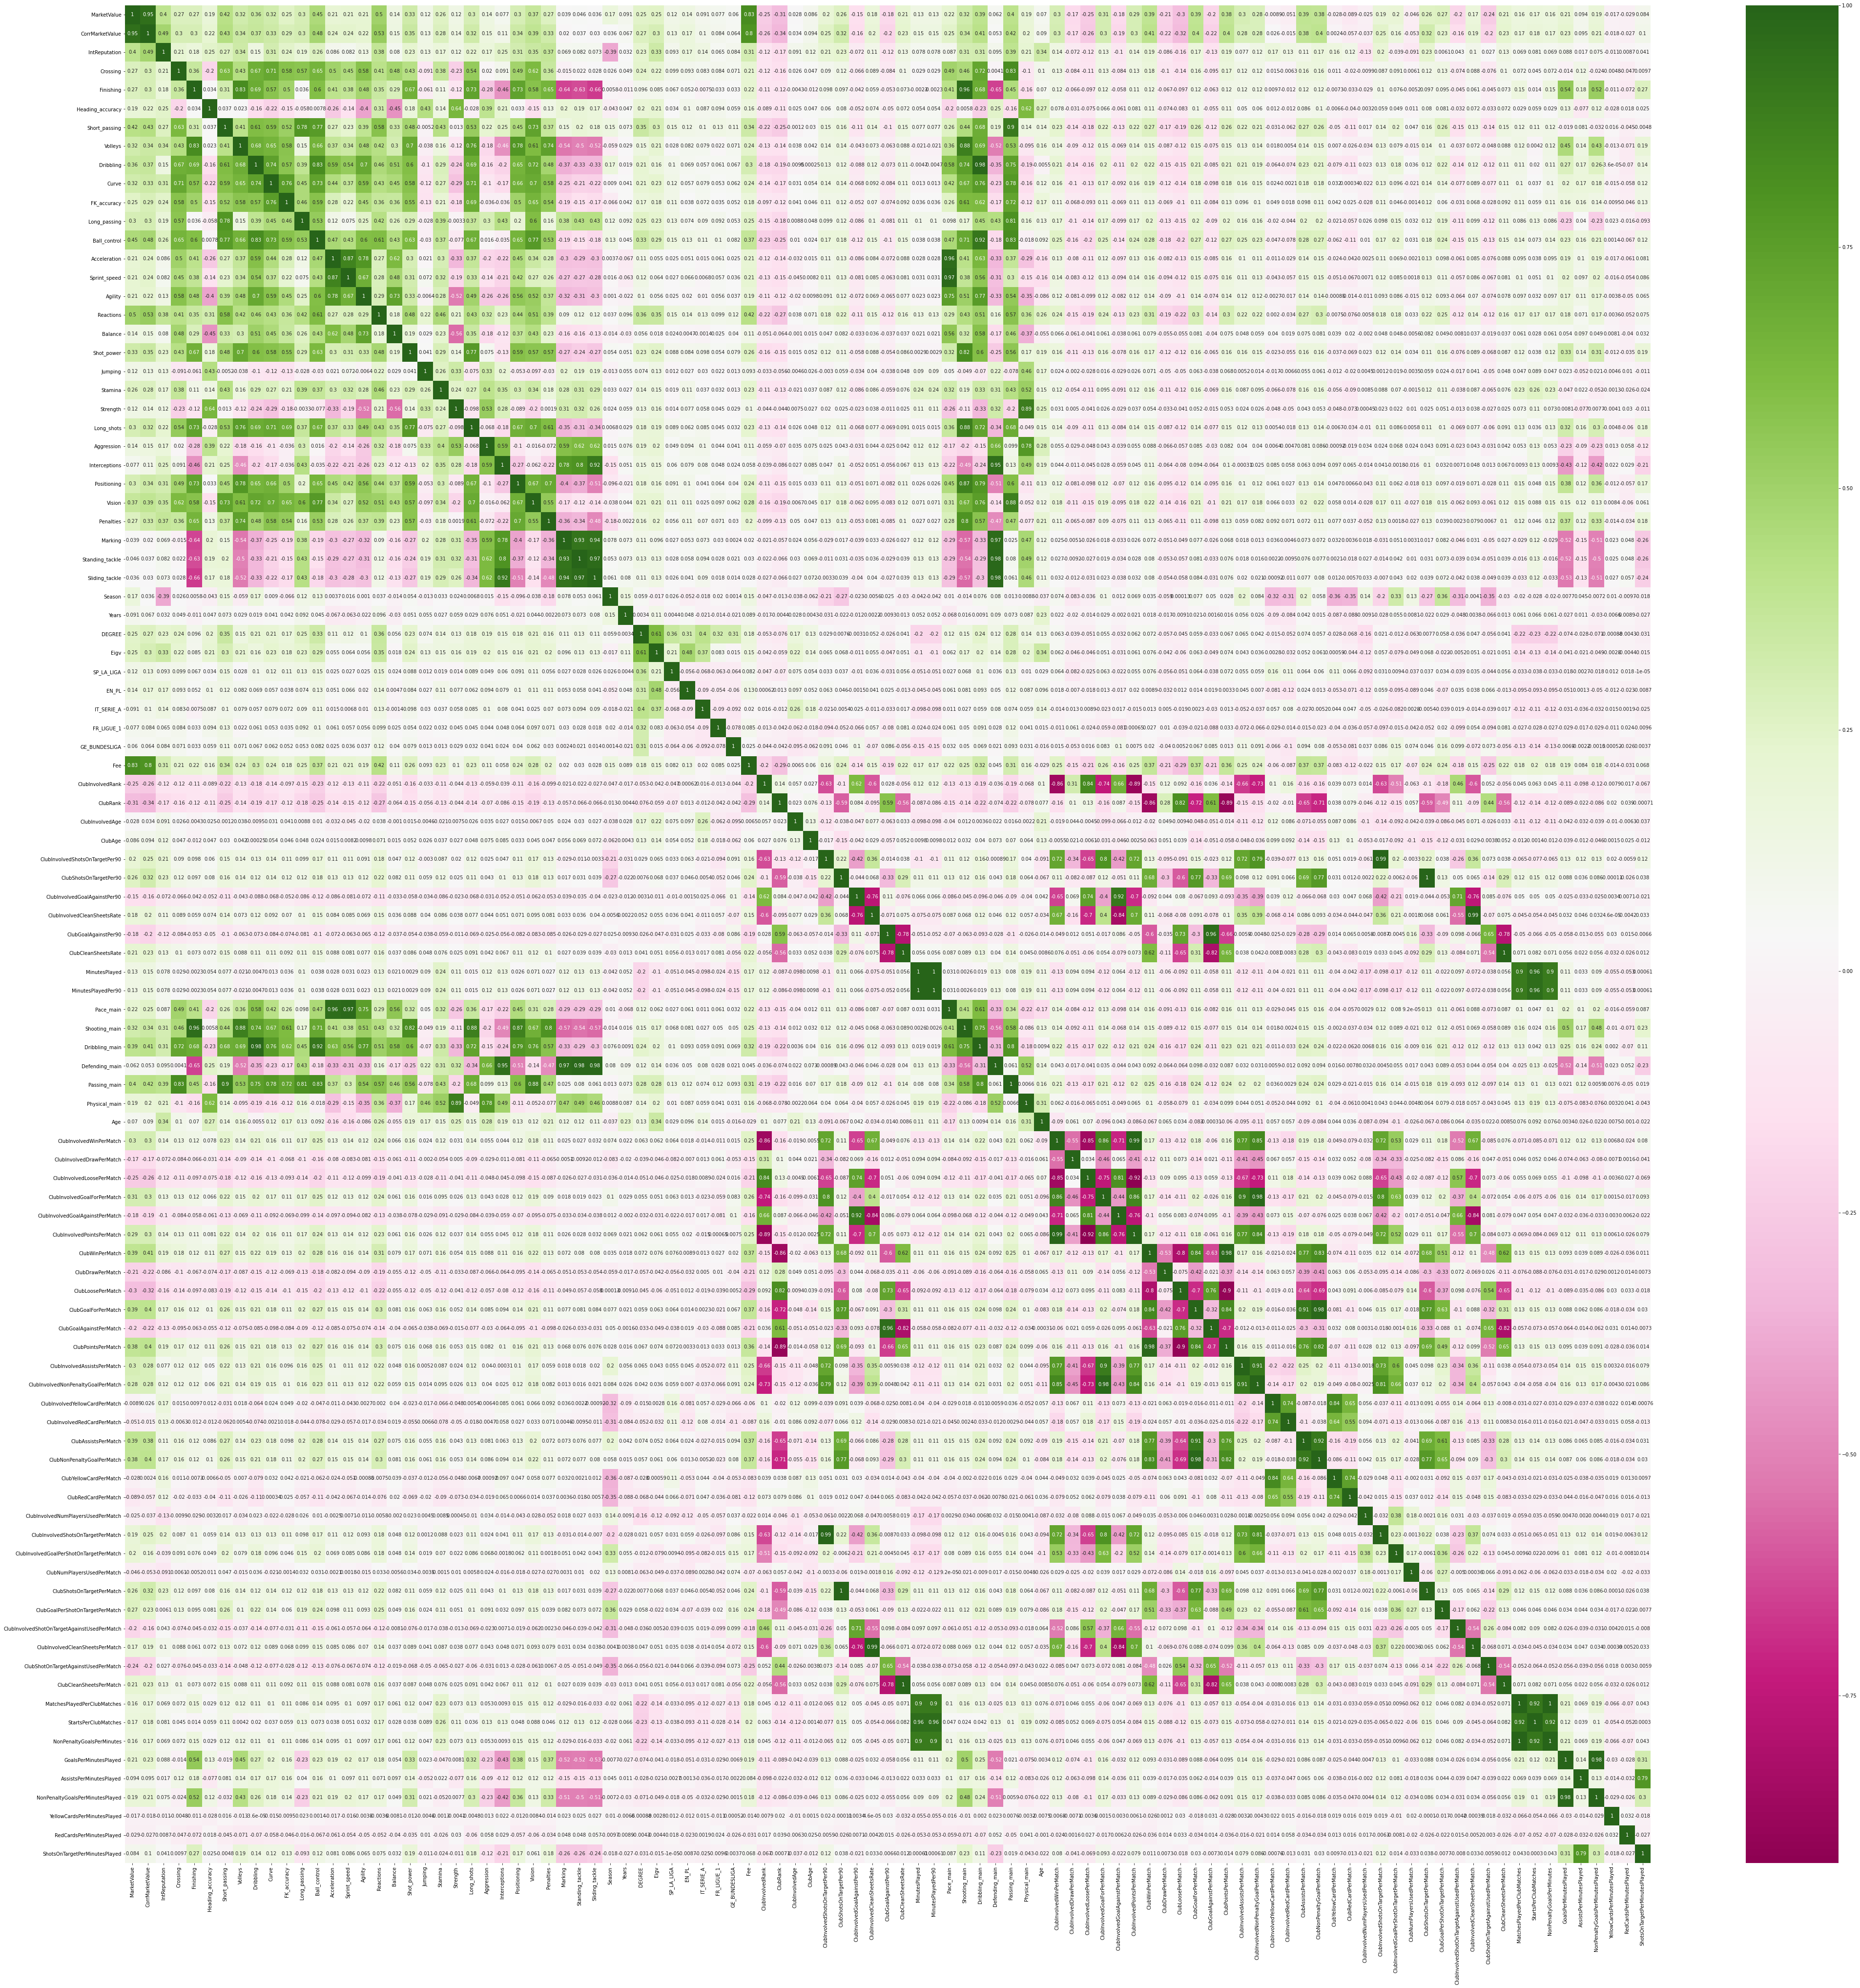

In [11]:
#check correlation
corrMatrix = df.corr()
plt.figure(figsize=(70,70))
sn.heatmap(corrMatrix, annot=True, cmap="PiYG")
plt.show()

In [5]:
print(list(df.columns))

['NewName', 'MarketValue', 'ClubInvolved', 'League', 'MainPosition', 'LeagueInvolved', 'CorrMarketValue', 'Country', 'Club', 'Position', 'Foot', 'IntReputation', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Dribbling', 'Curve', 'FK_accuracy', 'Long_passing', 'Ball_control', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Marking', 'Standing_tackle', 'Sliding_tackle', 'Years', 'DEGREE', 'Eigv', 'SP_LA_LIGA', 'EN_PL', 'IT_SERIE_A', 'FR_LIGUE_1', 'GE_BUNDESLIGA', 'ClubInvolvedRank', 'ClubRank', 'ClubInvolvedAge', 'ClubAge', 'ClubInvolvedShotsOnTargetPer90', 'ClubShotsOnTargetPer90', 'ClubInvolvedGoalAgainstPer90', 'ClubInvolvedCleanSheetsRate', 'ClubGoalAgainstPer90', 'ClubCleanSheetsRate', 'MinutesPlayed', 'MinutesPlayedPer90', 'ContractLeft', 'Pace_main', 'Shooting_main', 'Dribbling_main', 'Defending_main', 'P

In [ ]:
#Market Value
#keep from fifa: heading accuracy, reactions, balance, jumping
#minutes played, non penalty

In [4]:
df = df.drop(['MarketValue', 'Crossing', 'Finishing', 'Short_passing', 'Volleys', 'Dribbling', 'Curve', 'FK_accuracy', 'Long_passing', 'Ball_control', 'Acceleration',\
    'Sprint_speed', 'Agility', 'Shot_power', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Marking',\
        'Standing_tackle', 'Sliding_tackle', 'MinutesPlayed', 'ClubInvolvedNonPenaltyGoalPerMatch', 'NonPenaltyGoalsPerMinutes', 'NonPenaltyGoalsPerMinutesPlayed',\
            'ClubNonPenaltyGoalPerMatch'], axis = 1)

In [5]:
df = df.drop(['MatchesPlayedPerClubMatches', 'StartsPerClubMatches', 'ClubCleanSheetsRate', 'ClubInvolvedRank',\
    'ClubInvolvedWinPerMatch', 'ClubInvolvedDrawPerMatch', 'ClubInvolvedLoosePerMatch', 'ClubWinPerMatch', 'ClubDrawPerMatch',\
         'ClubLoosePerMatch'], axis = 1) #'ClubRank'

In [6]:
df = df.drop([ 'ClubInvolvedGoalAgainstPer90', 'ClubGoalAgainstPer90', 'ClubInvolvedShotsOnTargetPer90', 'ClubShotsOnTargetPer90'], axis = 1)

In [7]:
df = df.drop([ 'ClubInvolvedGoalAgainstPerMatch', 'ClubGoalAgainstPerMatch', 'ClubInvolvedCleanSheetsPerMatch', 'ClubCleanSheetsPerMatch',\
    'Dribbling_main', 'ClubInvolvedGoalForPerMatch', 'ClubGoalForPerMatch', 'ClubInvolvedAssistsPerMatch', 'ClubAssistsPerMatch', 'ClubInvolvedShotsOnTargetPerMatch',\
        'ClubShotsOnTargetPerMatch'], axis = 1)

In [8]:
df = df.drop([ 'ClubInvolvedYellowCardPerMatch', 'ClubInvolvedRedCardPerMatch', 'ClubYellowCardPerMatch', 'ClubRedCardPerMatch', 'ShotsOnTargetPerMinutesPlayed'], axis = 1)

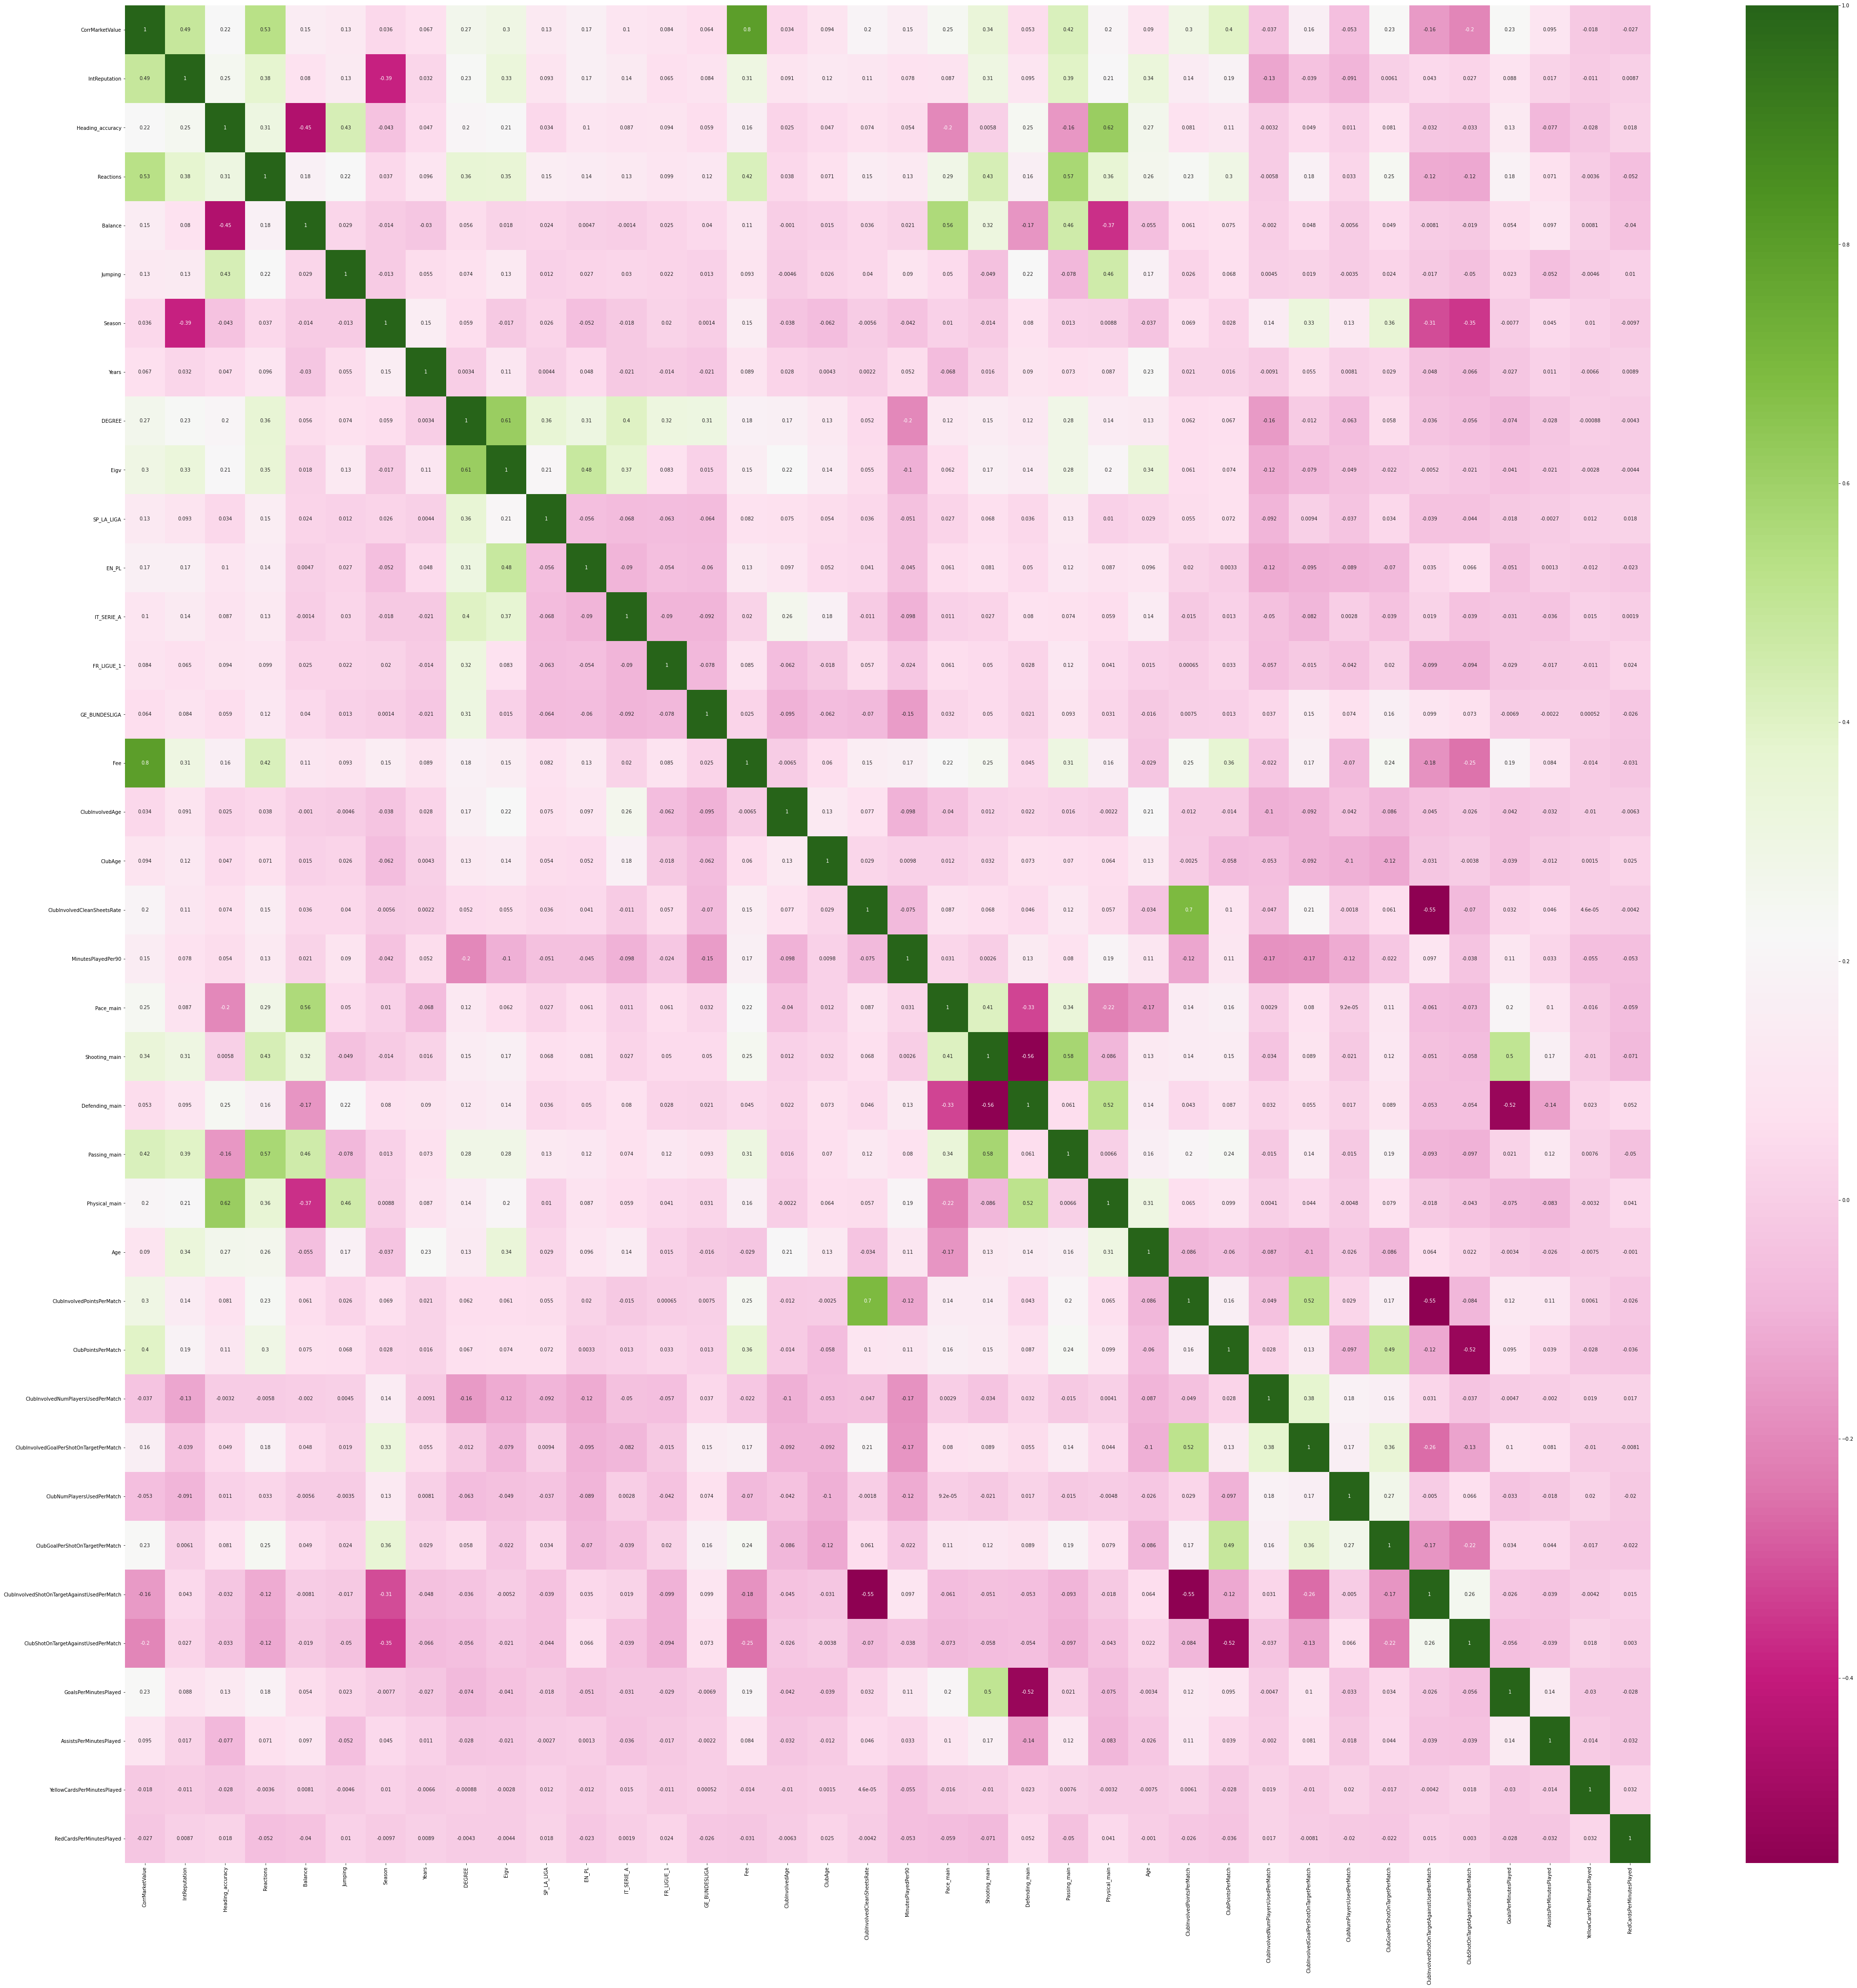

In [17]:
#check correlation
corrMatrix = df.corr()
plt.figure(figsize=(70,70))
sn.heatmap(corrMatrix, annot=True, cmap="PiYG")
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   NewName                                      11028 non-null  object 
 1   ClubInvolved                                 11028 non-null  object 
 2   League                                       11028 non-null  object 
 3   MainPosition                                 11028 non-null  object 
 4   LeagueInvolved                               11028 non-null  object 
 5   CorrMarketValue                              11028 non-null  float64
 6   Country                                      11028 non-null  object 
 7   Club                                         11028 non-null  object 
 8   Position                                     11028 non-null  object 
 9   Foot                                         11028 non-null  object 
 10

In [19]:
df.nunique().reset_index().sort_values(by=0)

index     0
9                                          Foot     2
3                                  MainPosition     3
10                                IntReputation     5
2                                        League    12
16                                        Years    12
15                                       Season    14
8                                      Position    17
35                                          Age    22
29                                 ContractLeft    26
20                                        EN_PL    32
21                                   IT_SERIE_A    34
22                                   FR_LIGUE_1    35
19                                   SP_LA_LIGA    35
23                                GE_BUNDESLIGA    35
17                                       DEGREE    36
34                                Physical_main    56
12                                    Reactions    66
33                                 Passing_main    67
14                                      Jumping    69
30                                    Pace_main    69
13                                      Balance    74
11                             Heading_accuracy    77
31                                Shooting_main    79
26                                      ClubAge    85
32                               Defending_main    89
25                              ClubInvolvedAge    90
4                                LeagueInvolved   102
40                   ClubNumPlayersUsedPerMatch   112
6                                       Country   125
41              ClubGoalPerShotOnTargetPerMatch   135
27                  ClubInvolvedCleanSheetsRate   193
38           ClubInvolvedNumPlayersUsedPerMatch   203
39      ClubInvolvedGoalPerShotOnTargetPerMatch   235
37                           ClubPointsPerMatch   265
7                                          Club   333
28                           MinutesPlayedPer90   457
36                   ClubInvolvedPointsPerMatch   472
43          ClubShotOnTargetAgainstUsedPerMatch   553
5                               CorrMarketValue   599
24                                          Fee   660
42  ClubInvolvedShotOnTargetAgainstUsedPerMatch   792
47                     RedCardsPerMinutesPlayed   993
1                                  ClubInvolved  1389
45                      AssistsPerMinutesPlayed  3110
44                        GoalsPerMinutesPlayed  3553
46                  YellowCardsPerMinutesPlayed  3985
18                                         Eigv  6731
0                                       NewName  7020

NEV= NewName
count      11028
unique      7020
top       Danilo
freq          10
Name: NewName, dtype: object
NULL= 0
NEV= ClubInvolved
count         11028
unique         1389
top       Genoa CFC
freq            126
Name: ClubInvolved, dtype: object
NULL= 0
NEV= League
count               11028
unique                 12
top       Italian Serie A
freq                 1693
Name: League, dtype: object
NULL= 0
NEV= MainPosition
count       11028
unique          3
top       Forward
freq         3961
Name: MainPosition, dtype: object
NULL= 0
NEV= LeagueInvolved
count               11028
unique                102
top       Italian Serie A
freq                 1430
Name: LeagueInvolved, dtype: object
NULL= 0
NEV= CorrMarketValue
count    11028.000000
mean         1.885296
std          3.260456
min          0.000000
25%          0.250000
50%          0.750000
75%          2.127660
max         48.000000
Name: CorrMarketValue, dtype: float64
NULL= 0


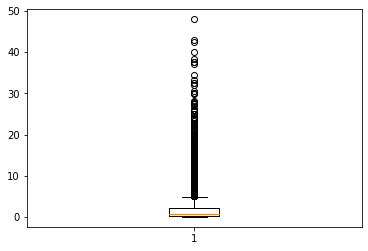

NEV= Country
count     11028
unique      125
top       Italy
freq       1597
Name: Country, dtype: object
NULL= 0
NEV= Club
count     11028
unique      333
top       Genoa
freq        106
Name: Club, dtype: object
NULL= 0
NEV= Position
count     11028
unique       17
top          ST
freq       2390
Name: Position, dtype: object
NULL= 0
NEV= Foot
count     11028
unique        2
top       Right
freq       8152
Name: Foot, dtype: object
NULL= 0
NEV= IntReputation
count    11028.000000
mean         1.485219
std          0.729024
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: IntReputation, dtype: float64
NULL= 0


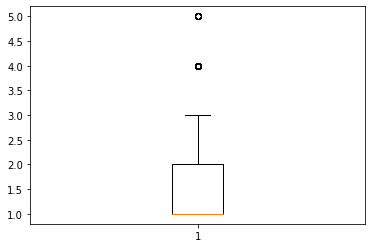

NEV= Heading_accuracy
count    11028.000000
mean        62.096391
std         12.220899
min         19.000000
25%         54.000000
50%         63.000000
75%         71.000000
max         95.000000
Name: Heading_accuracy, dtype: float64
NULL= 0


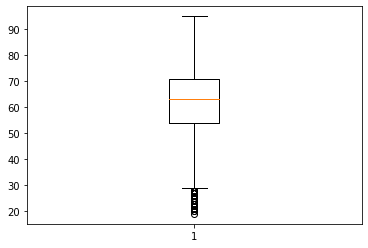

NEV= Reactions
count    11028.000000
mean        68.027566
std          8.263237
min         28.000000
25%         63.000000
50%         69.000000
75%         74.000000
max         96.000000
Name: Reactions, dtype: float64
NULL= 0


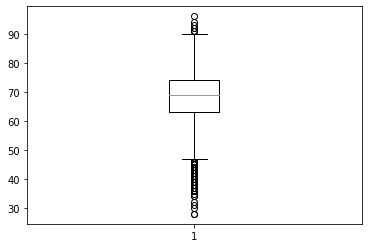

NEV= Balance
count    8596.000000
mean       67.096440
std        12.281188
min        20.000000
25%        60.000000
50%        68.000000
75%        75.000000
max        95.000000
Name: Balance, dtype: float64
NULL= 2432


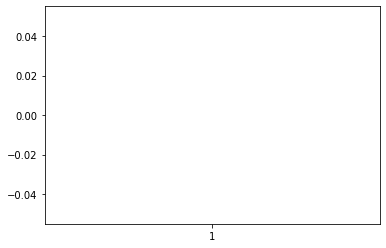

NEV= Jumping
count    8596.000000
mean       67.931131
std        11.061093
min        25.000000
25%        61.000000
50%        69.000000
75%        75.000000
max        95.000000
Name: Jumping, dtype: float64
NULL= 2432


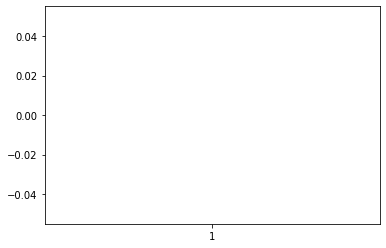

NEV= Season
count    11028.000000
mean      2014.484947
std          4.026895
min       2008.000000
25%       2011.000000
50%       2015.000000
75%       2018.000000
max       2021.000000
Name: Season, dtype: float64
NULL= 0


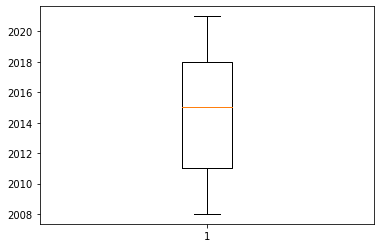

NEV= Years
count    11028.000000
mean         2.171654
std          1.036649
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Years, dtype: float64
NULL= 0


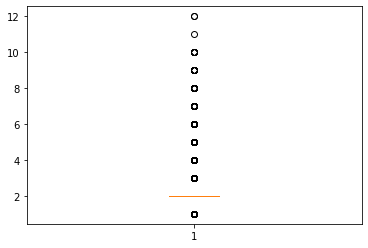

NEV= DEGREE
count    11028.000000
mean         9.962550
std          8.861302
min          0.000000
25%          0.000000
50%         10.000000
75%         17.000000
max         37.000000
Name: DEGREE, dtype: float64
NULL= 0


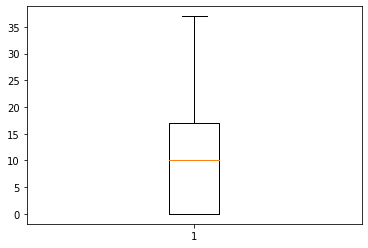

NEV= Eigv
count    11028.000000
mean         0.005894
std          0.008469
min          0.000000
25%          0.000000
50%          0.002263
75%          0.008788
max          0.074333
Name: Eigv, dtype: float64
NULL= 0


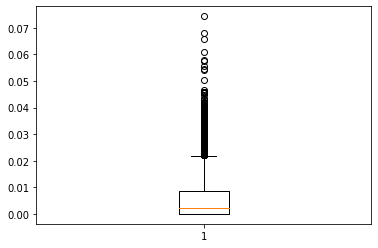

NEV= SP_LA_LIGA
count    11028.000000
mean         1.295702
std          4.507691
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: SP_LA_LIGA, dtype: float64
NULL= 0


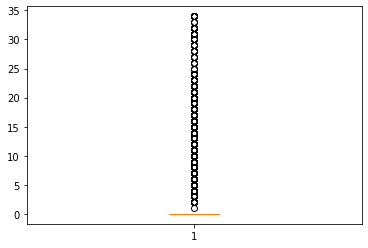

NEV= EN_PL
count    11028.000000
mean         1.319913
std          4.173673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         37.000000
Name: EN_PL, dtype: float64
NULL= 0


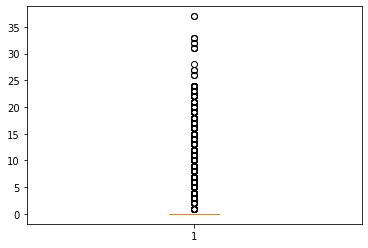

NEV= IT_SERIE_A
count    11028.000000
mean         1.970711
std          5.307533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: IT_SERIE_A, dtype: float64
NULL= 0


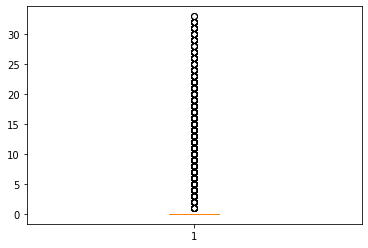

NEV= FR_LIGUE_1
count    11028.000000
mean         1.337595
std          4.417109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: FR_LIGUE_1, dtype: float64
NULL= 0


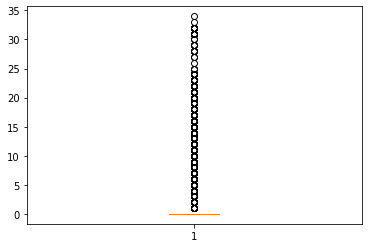

NEV= GE_BUNDESLIGA
count    11028.000000
mean         1.309485
std          4.400701
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: GE_BUNDESLIGA, dtype: float64
NULL= 0


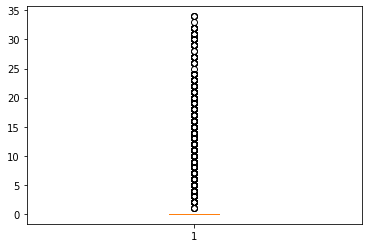

NEV= Fee
count    8859.000000
mean        3.977810
std         9.107186
min         0.000000
25%         0.050000
50%         0.890000
75%         3.800000
max       222.000000
Name: Fee, dtype: float64
NULL= 2169


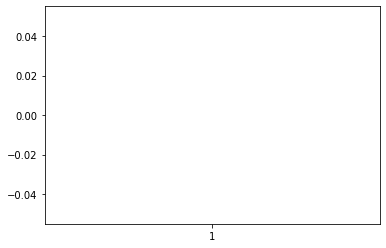

NEV= ClubInvolvedAge
count    7708.000000
mean       26.245070
std         1.382757
min        20.400000
25%        25.300000
50%        26.300000
75%        27.200000
max        31.300000
Name: ClubInvolvedAge, dtype: float64
NULL= 3320


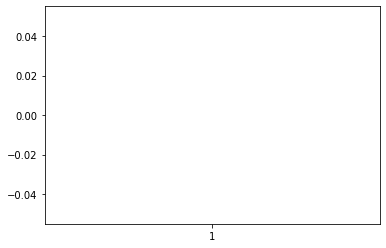

NEV= ClubAge
count    8598.000000
mean       26.366074
std         1.314860
min        20.800000
25%        25.500000
50%        26.400000
75%        27.200000
max        31.300000
Name: ClubAge, dtype: float64
NULL= 2430


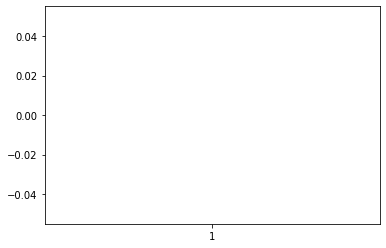

NEV= ClubInvolvedCleanSheetsRate
count    7707.00000
mean       30.71775
std        10.93036
min         0.00000
25%        23.50000
50%        29.40000
75%        36.80000
max        73.10000
Name: ClubInvolvedCleanSheetsRate, dtype: float64
NULL= 3321


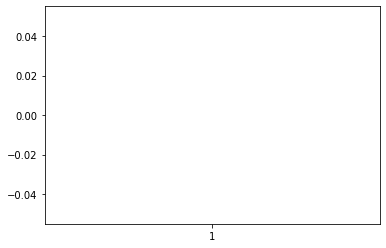

NEV= MinutesPlayedPer90
count    6331.000000
mean       19.522856
std        11.405209
min         0.000000
25%         9.700000
50%        20.500000
75%        28.800000
max        46.000000
Name: MinutesPlayedPer90, dtype: float64
NULL= 4697


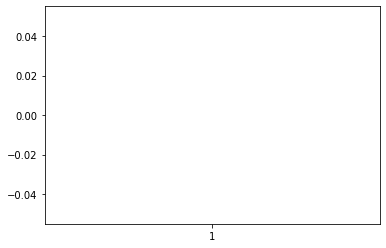

NEV= ContractLeft
count     10860
unique       26
top           0
freq       2359
Name: ContractLeft, dtype: object
NULL= 168
NEV= Pace_main
count    11028.000000
mean        71.778020
std          9.789535
min         26.000000
25%         66.000000
50%         72.000000
75%         78.000000
max         97.000000
Name: Pace_main, dtype: float64
NULL= 0


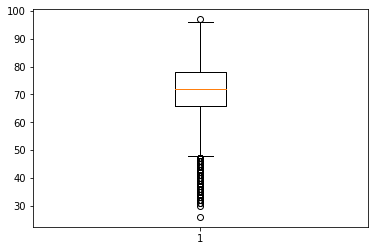

NEV= Shooting_main
count    8596.000000
mean       58.435900
std        14.260633
min        14.000000
25%        49.000000
50%        62.000000
75%        69.000000
max        93.000000
Name: Shooting_main, dtype: float64
NULL= 2432


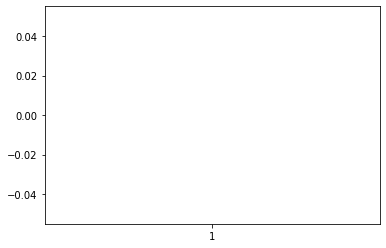

NEV= Defending_main
count    8596.000000
mean       62.341089
std        22.887234
min        18.000000
25%        39.000000
50%        68.000000
75%        83.000000
max       108.000000
Name: Defending_main, dtype: float64
NULL= 2432


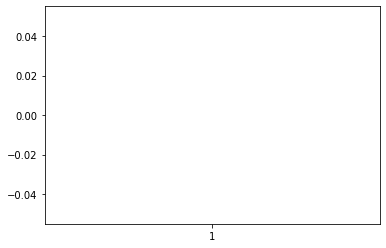

NEV= Passing_main
count    8596.000000
mean       64.991508
std        10.810152
min        28.000000
25%        58.000000
50%        66.000000
75%        73.000000
max        94.000000
Name: Passing_main, dtype: float64
NULL= 2432


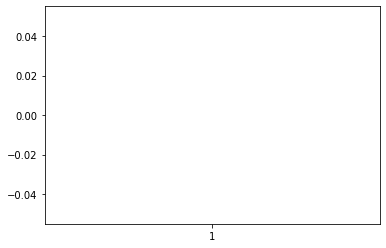

NEV= Physical_main
count    8596.00000
mean       68.41403
std         8.87709
min        34.00000
25%        63.00000
50%        70.00000
75%        75.00000
max        89.00000
Name: Physical_main, dtype: float64
NULL= 2432


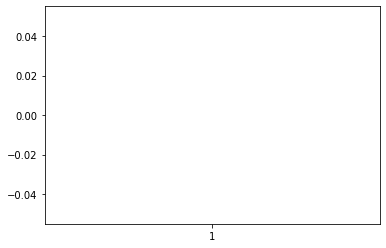

NEV= Age
count    11028.000000
mean        24.162133
std          3.516948
min         16.000000
25%         22.000000
50%         24.000000
75%         27.000000
max         37.000000
Name: Age, dtype: float64
NULL= 0


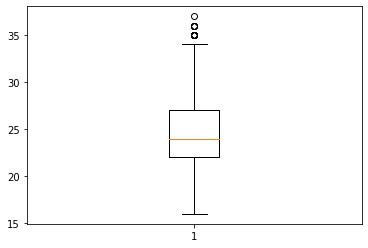

NEV= ClubInvolvedPointsPerMatch
count    7708.000000
mean        1.526925
std         0.426422
min         0.400000
25%         1.205882
50%         1.447368
75%         1.789474
max         2.833333
Name: ClubInvolvedPointsPerMatch, dtype: float64
NULL= 3320


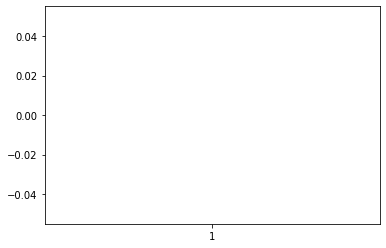

NEV= ClubPointsPerMatch
count    8598.000000
mean        1.444332
std         0.369850
min         0.576923
25%         1.176471
50%         1.342105
75%         1.631579
max         2.800000
Name: ClubPointsPerMatch, dtype: float64
NULL= 2430


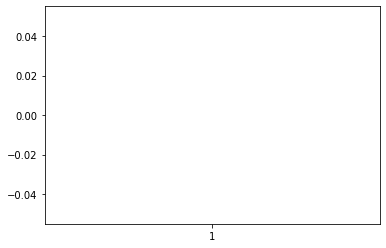

NEV= ClubInvolvedNumPlayersUsedPerMatch
count    7450.000000
mean        0.769181
std         0.133924
min         0.434783
25%         0.684211
50%         0.750000
75%         0.823529
max         2.000000
Name: ClubInvolvedNumPlayersUsedPerMatch, dtype: float64
NULL= 3578


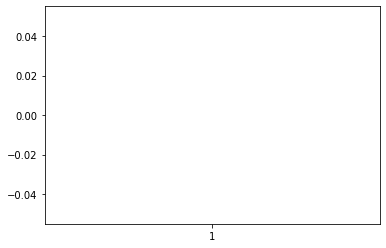

NEV= ClubInvolvedGoalPerShotOnTargetPerMatch
count    7450.000000
mean        0.007286
std         0.001732
min         0.003043
25%         0.006053
50%         0.007105
75%         0.008235
max         0.021250
Name: ClubInvolvedGoalPerShotOnTargetPerMatch, dtype: float64
NULL= 3578


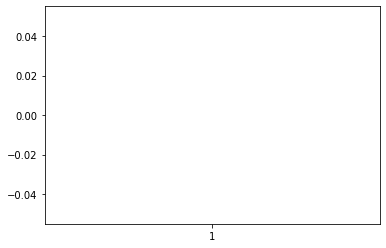

NEV= ClubNumPlayersUsedPerMatch
count    8460.000000
mean        0.744078
std         0.102098
min         0.434783
25%         0.666667
50%         0.736842
75%         0.804348
max         1.307692
Name: ClubNumPlayersUsedPerMatch, dtype: float64
NULL= 2568


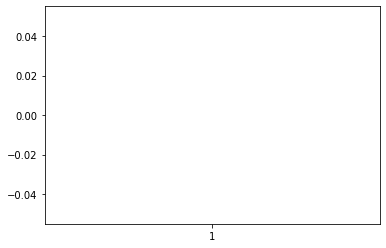

NEV= ClubGoalPerShotOnTargetPerMatch
count    8460.000000
mean        0.006957
std         0.001542
min         0.003043
25%         0.005870
50%         0.006842
75%         0.007895
max         0.013600
Name: ClubGoalPerShotOnTargetPerMatch, dtype: float64
NULL= 2568


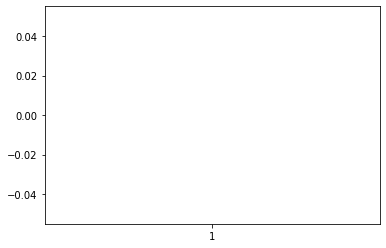

NEV= ClubInvolvedShotOnTargetAgainstUsedPerMatch
count    7484.000000
mean        4.264974
std         0.885762
min         0.000000
25%         3.705882
50%         4.289474
75%         4.794118
max         8.235294
Name: ClubInvolvedShotOnTargetAgainstUsedPerMatch, dtype: float64
NULL= 3544


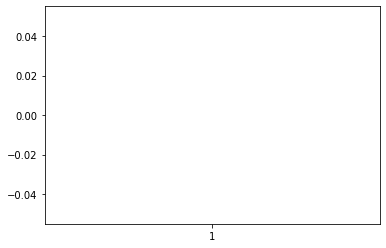

NEV= ClubShotOnTargetAgainstUsedPerMatch
count    8460.000000
mean        4.374423
std         0.825866
min         0.690476
25%         3.833333
50%         4.342105
75%         4.852941
max         7.782609
Name: ClubShotOnTargetAgainstUsedPerMatch, dtype: float64
NULL= 2568


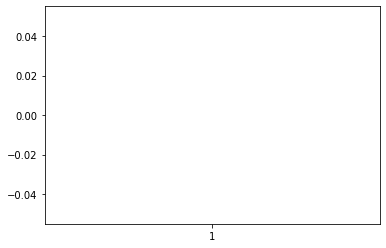

NEV= GoalsPerMinutesPlayed
count    6331.000000
mean        0.001897
std         0.002482
min         0.000000
25%         0.000000
50%         0.001002
75%         0.002959
max         0.040000
Name: GoalsPerMinutesPlayed, dtype: float64
NULL= 4697


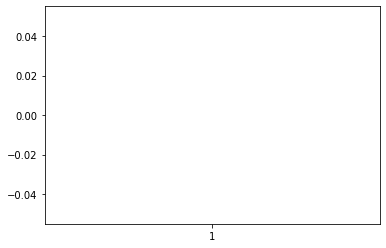

NEV= AssistsPerMinutesPlayed
count    6325.000000
mean        0.001099
std         0.002654
min         0.000000
25%         0.000000
50%         0.000688
75%         0.001652
max         0.166667
Name: AssistsPerMinutesPlayed, dtype: float64
NULL= 4703


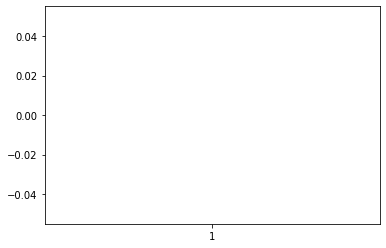

NEV= YellowCardsPerMinutesPlayed
count    6331.000000
mean        0.002500
std         0.013928
min         0.000000
25%         0.000877
50%         0.001852
75%         0.002939
max         1.000000
Name: YellowCardsPerMinutesPlayed, dtype: float64
NULL= 4697


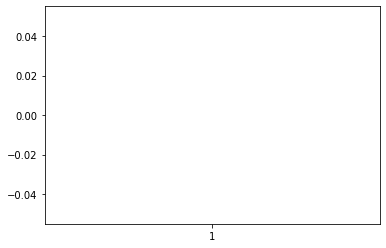

NEV= RedCardsPerMinutesPlayed
count    6331.000000
mean        0.000146
std         0.000640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.030303
Name: RedCardsPerMinutesPlayed, dtype: float64
NULL= 4697


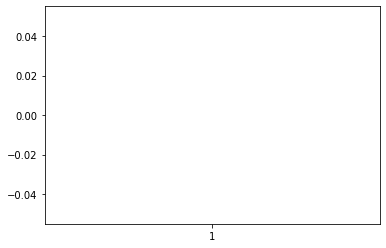

In [20]:
for v in df.columns:
    print("NEV=",v)
    print(df[v].describe())
    print("NULL=",  df[v].isna().sum())
    try:
        plt.boxplot(df[v])
        plt.show()
    except:
        pass

In [21]:
df.IntReputation.value_counts()

1    7115
2    2579
3    1241
4      82
5      11
Name: IntReputation, dtype: int64

In [22]:
df.ContractLeft.value_counts()

0          2359
1          2079
2          1333
-1         1094
#VALUE!     783
3           649
-2009       224
-2008       221
-2          217
-2010       196
-2018       173
-2012       162
4           145
-2011       138
-2015       137
-2017       135
-2019       127
-2013       125
-2016       120
-3          119
-2021       111
-2020       107
-4           79
5            25
7             1
6             1
Name: ContractLeft, dtype: int64

In [10]:
df = df.replace('-4', 0)
df = df.replace('-3', 0)
df = df.replace('-2021', 0)
df = df.replace('-2013', 0)
df = df.replace('-2020', 0)
df = df.replace('-2016', 0)
df = df.replace('-2019', 0)
df = df.replace('-2015', 0)
df = df.replace('-2012', 0)
df = df.replace('-2017', 0)
df = df.replace('-2', 0)
df = df.replace('-2011', 0)
df = df.replace('-2018', 0)
df = df.replace('-2010', 0)
df = df.replace('-2009', 0)
df = df.replace('-2008', 0)
df = df.replace('#VALUE!', 0)
df = df.replace('-1', 0)


In [11]:
df.ContractLeft.value_counts()

0    4268
0    2359
1    2079
2    1333
3     649
4     145
5      25
7       1
6       1
Name: ContractLeft, dtype: int64

In [12]:
df['ContractLeft'] = df.ContractLeft.fillna(0)

In [13]:
df['ContractLeft'] = df.ContractLeft.astype(int)

In [14]:
print(list(df.columns))

['NewName', 'ClubInvolved', 'League', 'MainPosition', 'LeagueInvolved', 'CorrMarketValue', 'Country', 'Club', 'Position', 'Foot', 'IntReputation', 'Heading_accuracy', 'Reactions', 'Balance', 'Jumping', 'Season', 'Years', 'DEGREE', 'Eigv', 'SP_LA_LIGA', 'EN_PL', 'IT_SERIE_A', 'FR_LIGUE_1', 'GE_BUNDESLIGA', 'Fee', 'ClubRank', 'ClubInvolvedAge', 'ClubAge', 'ClubInvolvedCleanSheetsRate', 'MinutesPlayedPer90', 'ContractLeft', 'Pace_main', 'Shooting_main', 'Defending_main', 'Passing_main', 'Physical_main', 'Age', 'ClubInvolvedPointsPerMatch', 'ClubPointsPerMatch', 'ClubInvolvedNumPlayersUsedPerMatch', 'ClubInvolvedGoalPerShotOnTargetPerMatch', 'ClubNumPlayersUsedPerMatch', 'ClubGoalPerShotOnTargetPerMatch', 'ClubInvolvedShotOnTargetAgainstUsedPerMatch', 'ClubShotOnTargetAgainstUsedPerMatch', 'GoalsPerMinutesPlayed', 'AssistsPerMinutesPlayed', 'YellowCardsPerMinutesPlayed', 'RedCardsPerMinutesPlayed']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   NewName                                      11028 non-null  object 
 1   ClubInvolved                                 11028 non-null  object 
 2   League                                       11028 non-null  object 
 3   MainPosition                                 11028 non-null  object 
 4   LeagueInvolved                               11028 non-null  object 
 5   CorrMarketValue                              11028 non-null  float64
 6   Country                                      11028 non-null  object 
 7   Club                                         11028 non-null  object 
 8   Position                                     11028 non-null  object 
 9   Foot                                         11028 non-null  object 
 10

In [16]:
df.to_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/Adatok/TRAIN_CLEARED_2part.csv")

In [82]:
df = pd.read_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/Adatok/TRAIN_CLEARED.csv")
df = df.drop(['Unnamed: 0'], axis=1)

Test model

In [29]:
league_outf_train_df = df.drop(['NewName', 'ClubInvolved', 'Club', 'ClubAge', 'ClubNumPlayersUsedPerMatch',\
     'ClubGoalPerShotOnTargetPerMatch', 'ClubShotOnTargetAgainstUsedPerMatch', 'ClubPointsPerMatch', 'Fee'], axis = 1)

In [7]:
club_outf_train_df = df.drop(['NewName', 'ClubInvolved'], axis = 1)

In [30]:
league_outf_train_df['target'] = 0
league_outf_train_df.loc[league_outf_train_df.League == 'Spain Primera Division', 'target'] = 1

In [8]:
club_outf_train_df['target'] = 0
club_outf_train_df.loc[club_outf_train_df.League == 'Spain Primera Division', 'target'] = 1

In [31]:
league_outf_train_df = league_outf_train_df.drop('League', axis=1)

In [10]:
club_outf_train_df = club_outf_train_df.drop('Club', axis=1)

In [32]:
league_outf_train_df['target'].value_counts()

0    10034
1      994
Name: target, dtype: int64

In [33]:
club_outf_train_df['target'].value_counts()

NameError: name 'club_outf_train_df' is not defined

In [34]:
league_outf_train_df.columns

Index(['MainPosition', 'LeagueInvolved', 'CorrMarketValue', 'Country',
       'Position', 'Foot', 'IntReputation', 'Heading_accuracy', 'Reactions',
       'Balance', 'Jumping', 'Season', 'Years', 'DEGREE', 'Eigv', 'SP_LA_LIGA',
       'EN_PL', 'IT_SERIE_A', 'FR_LIGUE_1', 'GE_BUNDESLIGA', 'ClubInvolvedAge',
       'ClubInvolvedCleanSheetsRate', 'MinutesPlayedPer90', 'ContractLeft',
       'Pace_main', 'Shooting_main', 'Defending_main', 'Passing_main',
       'Physical_main', 'Age', 'ClubInvolvedPointsPerMatch',
       'ClubInvolvedNumPlayersUsedPerMatch',
       'ClubInvolvedGoalPerShotOnTargetPerMatch',
       'ClubInvolvedShotOnTargetAgainstUsedPerMatch', 'GoalsPerMinutesPlayed',
       'AssistsPerMinutesPlayed', 'YellowCardsPerMinutesPlayed',
       'RedCardsPerMinutesPlayed', 'target'],
      dtype='object')

In [35]:
#set feature list and target
feature_list = list(league_outf_train_df.columns.values)
feature_list.remove('target')
target = 'target'

# define dataset
X = league_outf_train_df[feature_list]
y = league_outf_train_df[target]

In [36]:
#set feature list and target
feature_list = list(club_outf_train_df.columns.values)
feature_list.remove('target')
target = 'target'

# define dataset
X = club_outf_train_df[feature_list]
y = club_outf_train_df[target]

NameError: name 'club_outf_train_df' is not defined

In [36]:
import category_encoders as ce
#encoding the categorival variables using target encoding
cbe_encoder = ce.cat_boost.CatBoostEncoder()
X_cbe = cbe_encoder.fit_transform(X,y)

In [37]:
#Impute missing values
imputer = IterativeImputer()
imputer.fit(X_cbe)
X_imp = imputer.transform(X_cbe)
X_imp = pd.DataFrame(data = X_imp, columns = X_cbe.columns)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [38]:
#standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define the model
model = XGBClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st , y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

# report performance
for key, value in n_scores.items():
    print(key, mean(value))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

[12:36:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:36:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory c

[12:37:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory c

[12:37:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory c

[12:37:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarnin

[12:37:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.war

[12:37:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory c

fit_time 9.817473006248473
score_time 0.053595352172851565
test_acc 0.9255979402816605
test_recall 0.351040404040404
test_auc 0.8994759473440916
test_precison 0.6710437723406222
test_f1 0.45908141250010076


In [40]:
# report performance
for key, value in n_scores.items():
    print(key, mean(value))

fit_time 9.817473006248473
score_time 0.053595352172851565
test_acc 0.9255979402816605
test_recall 0.351040404040404
test_auc 0.8994759473440916
test_precison 0.6710437723406222
test_f1 0.45908141250010076


In [94]:
positives = league_outf_train_df[league_outf_train_df.target == 1]

In [20]:
positives = club_outf_train_df[club_outf_train_df.target == 1]

In [95]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(positives)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/copulas/uni

In [96]:
sample = model.sample(5000)
sample.head()

MainPosition          LeagueInvolved  CorrMarketValue   Country Position  \
0   Midfielder  English Premier League         0.213123  Cameroon       LB   
1     Defender                 Belgium         2.043305     Spain      CDM   
2     Defender      Holland Eredivisie         2.479186     Spain       RB   
3   Midfielder  Russian Premier League         1.390587     Spain       RM   
4     Defender  English Premier League         0.225269     Spain       CF   

    Foot  IntReputation  Heading_accuracy  Reactions  Balance  ...  Age  \
0  Right              3                38         75      NaN  ...   23   
1  Right              1                76         71     39.0  ...   25   
2  Right              1                60         69     54.0  ...   23   
3  Right              1                75         77     65.0  ...   28   
4  Right              1                59         63      NaN  ...   26   

   ClubInvolvedPointsPerMatch  ClubInvolvedNumPlayersUsedPerMatch  \
0                    1.431741                            0.908484   
1                    1.406257                            0.718347   
2                         NaN                            0.732154   
3                    1.956614                            0.946618   
4                    1.390461                            0.822840   

   ClubInvolvedGoalPerShotOnTargetPerMatch  \
0                                 0.005398   
1                                 0.006043   
2                                 0.006903   
3                                 0.008234   
4                                 0.008163   

   ClubInvolvedShotOnTargetAgainstUsedPerMatch  GoalsPerMinutesPlayed  \
0                                     4.591359               0.000148   
1                                     3.829896               0.000946   
2                                          NaN               0.000000   
3                                          NaN               0.002566   
4                                     3.728487                    NaN   

   AssistsPerMinutesPlayed  YellowCardsPerMinutesPlayed  \
0                 0.000402                     0.002588   
1                 0.000761                     0.002689   
2                 0.001048                     0.002715   
3                 0.001037                     0.002606   
4                      NaN                          NaN   

   RedCardsPerMinutesPlayed  target  
0                  0.000219       1  
1                  0.000080       1  
2                  0.000150       1  
3                  0.000075       1  
4                       NaN       1  

[5 rows x 38 columns]

In [97]:
from sdv.evaluation import evaluate
evaluate(sample, positives, metrics=['CSTest', 'KSTest'], aggregate=False)

metric                                     name  raw_score  \
0  CSTest                              Chi-Squared   0.914577   
1  KSTest  Inverted Kolmogorov-Smirnov D statistic   0.874081   

   normalized_score  min_value  max_value      goal error  
0          0.914577        0.0        1.0  MAXIMIZE  None  
1          0.874081        0.0        1.0  MAXIMIZE  None

In [98]:
league_outf_train_df_synt = league_outf_train_df.append(sample)

In [26]:
club_outf_train_df_synt = club_outf_train_df.append(sample)

In [99]:
league_outf_train_df_synt['target'].value_counts()

0    14176
1     5994
Name: target, dtype: int64

In [28]:
club_outf_train_df_synt['target'].value_counts()

0    14176
1     5994
Name: target, dtype: int64

In [18]:
league_outf_train_df_synt = league_outf_train_df_synt.drop(['ClubAge', 'ClubNumPlayersUsedPerMatch', 'ClubGoalPerShotOnTargetPerMatch', 'ClubShotOnTargetAgainstUsedPerMatch', 'ClubPointsPerMatch'], axis =1) 

KeyError: "['ClubAge' 'ClubNumPlayersUsedPerMatch' 'ClubGoalPerShotOnTargetPerMatch'\n 'ClubShotOnTargetAgainstUsedPerMatch'] not found in axis"

In [100]:
#set feature list and target
feature_list = list(league_outf_train_df_synt.columns.values)
feature_list.remove('target')
target = 'target'

# define dataset
X = league_outf_train_df_synt[feature_list]
y = league_outf_train_df_synt[target]

In [20]:
#set feature list and target
feature_list = list(club_outf_train_df_synt.columns.values)
feature_list.remove('target')
target = 'target'

# define dataset
X = club_outf_train_df_synt[feature_list]
y = club_outf_train_df_synt[target]

NameError: name 'club_outf_train_df_synt' is not defined

In [101]:
import category_encoders as ce
#encoding the categorival variables using target encoding
cbe_encoder = ce.cat_boost.CatBoostEncoder()
X_cbe = cbe_encoder.fit_transform(X,y)

In [102]:
#Impute missing values
imputer = IterativeImputer()
imputer.fit(X_cbe)
X_imp = imputer.transform(X_cbe)
X_imp = pd.DataFrame(data = X_imp, columns = X_cbe.columns)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [103]:
#standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X_imp_st, y, test_size=0.33, random_state=42)

pipe = Pipeline([('KNeighbors_classifier', XGBClassifier(n_estimators=50))])
pipe.fit(X_train, y_train)

te_score = accuracy_score(y_test,pipe.predict(X_test))
f1_scor = f1_score(y_test, pipe.predict(X_test), average='macro')
f1_scor

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9422839743956972

In [104]:
# define the model
model = XGBClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st , y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

# report performance
for key, value in n_scores.items():
    print(key, mean(value))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

[11:13:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory c

[11:13:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory c

[11:13:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this w

[11:14:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory c

fit_time 22.529893398284912
score_time 0.14155068397521972
test_acc 0.9497934225747808
test_recall 0.8814928318581197
test_auc 0.9829402142604625
test_precison 0.9458962170568334
test_f1 0.9125354365503466


In [132]:
metrics = []
# report performance
for key, value in n_scores.items():
    print(key, mean(value))
    metrics.append(round(mean(value),2))

fit_time 22.529893398284912
score_time 0.14155068397521972
test_acc 0.9497934225747808
test_recall 0.8814928318581197
test_auc 0.9829402142604625
test_precison 0.9458962170568334
test_f1 0.9125354365503466


In [133]:
df_metrics = pd.DataFrame(columns=['Accuracy', 'Recall', 'AUC', 'Precision', 'F1'])

In [134]:
df_metrics = df_metrics.append({'Accuracy':metrics[2], 'Recall':metrics[3], 'AUC':metrics[4],\
    'Precision':metrics[5], 'F1':metrics[6]}, ignore_index=True)

In [135]:
df_metrics.to_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/TransferPredict/transfer_predict_api/transferPredict/transferPredictApp/Predictions/Data/df_metrics.csv")

In [142]:
model = XGBClassifier(n_estimators=50)
m = model.fit(X_imp_st , y)
zip_iterator = zip(list(X_imp.columns), [np.round(x,2) for x in m.feature_importances_])
feature_dict = dict(zip_iterator)
feature_dict = dict( sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True))

[13:22:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [139]:
feature_dict = dict( sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True))

In [146]:
feature_df = pd.DataFrame.from_dict(feature_dict, orient='index').T.iloc[:, :15]
feature_df.to_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/TransferPredict/transfer_predict_api/transferPredict/transferPredictApp/Predictions/Data/feature_df.csv")

In [37]:
X.columns

Index(['MainPosition', 'LeagueInvolved', 'CorrMarketValue', 'Country',
       'Position', 'Foot', 'IntReputation', 'Heading_accuracy', 'Reactions',
       'Balance', 'Jumping', 'Years', 'DEGREE', 'Eigv', 'SP_LA_LIGA', 'EN_PL',
       'IT_SERIE_A', 'FR_LIGUE_1', 'GE_BUNDESLIGA', 'ClubInvolvedAge',
       'ClubAge', 'ClubInvolvedCleanSheetsRate', 'MinutesPlayedPer90',
       'ContractLeft', 'Pace_main', 'Shooting_main', 'Defending_main',
       'Passing_main', 'Physical_main', 'Age', 'ClubInvolvedPointsPerMatch',
       'ClubPointsPerMatch', 'ClubInvolvedNumPlayersUsedPerMatch',
       'ClubInvolvedGoalPerShotOnTargetPerMatch', 'ClubNumPlayersUsedPerMatch',
       'ClubGoalPerShotOnTargetPerMatch',
       'ClubInvolvedShotOnTargetAgainstUsedPerMatch',
       'ClubShotOnTargetAgainstUsedPerMatch', 'GoalsPerMinutesPlayed',
       'AssistsPerMinutesPlayed', 'YellowCardsPerMinutesPlayed',
       'RedCardsPerMinutesPlayed'],
      dtype='object')

In [40]:
predict_df = pd.read_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/Adatok/predict_df_temp3.csv")
predict_df = predict_df.drop('Unnamed: 0', axis = 1)
print(list(predict_df.columns))

['Name', 'Age', 'Nationality', 'Pos', 'MarketValue', 'LeagueInvolved', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Dribbling', 'Curve', 'FK_accuracy', 'Long_passing', 'Ball_control', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing_tackle', 'Sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes', 'ID', 'Joined', 'IntReputation', 'Foot', 'Position', 'Country', 'NewMarketValue', 'DEGREE', 'Eigv', 'SP_LA_LIGA', 'EN_PL', 'IT_SERIE_A', 'FR_LIGUE_1', 'GE_BUNDESLIGA', 'Years', 'MainPosition', 'Season', 'ClubInvolved', 'ContractGood', 'ContractLeft', 'ClubInvolvedRank', 'ClubInvolvedWin', 'ClubInvolvedDraw', 'ClubInvolvedLoose', 'ClubInvolvedGoalFor', 'ClubInvolvedGoalAgainst', 'ClubInvolvedPoints', 'ClubInvolvedAge', 'ClubInovlvedPossession', 'Club

In [45]:

team = 'FC Barcelona'
team_df = predict_df[predict_df.ClubInvolved == team].loc[0]

Name                    L. Messi
Age                           33
Nationality            Argentina
Pos                        FW,MF
MarketValue                103.5
                         ...    
GKWin                        NaN
GKDraw                       NaN
GKLost                       NaN
GKCleanSheet                 NaN
GKCleanSheetPercent          NaN
Name: 0, Length: 122, dtype: object

In [53]:
print(list(predict_df[predict_df.ClubInvolved == team].columns))

['Name', 'Age', 'Nationality', 'Pos', 'MarketValue', 'LeagueInvolved', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Dribbling', 'Curve', 'FK_accuracy', 'Long_passing', 'Ball_control', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing_tackle', 'Sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes', 'ID', 'Joined', 'IntReputation', 'Foot', 'Position', 'Country', 'NewMarketValue', 'DEGREE', 'Eigv', 'SP_LA_LIGA', 'EN_PL', 'IT_SERIE_A', 'FR_LIGUE_1', 'GE_BUNDESLIGA', 'Years', 'MainPosition', 'Season', 'ClubInvolved', 'ContractGood', 'ContractLeft', 'ClubInvolvedRank', 'ClubInvolvedWin', 'ClubInvolvedDraw', 'ClubInvolvedLoose', 'ClubInvolvedGoalFor', 'ClubInvolvedGoalAgainst', 'ClubInvolvedPoints', 'ClubInvolvedAge', 'ClubInovlvedPossession', 'Club

In [151]:
predict_df = pd.read_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/Adatok/predict_df_temp3.csv")
predict_df = predict_df.drop('Unnamed: 0', axis = 1)

# team = 'FC Barcelona'
# team_df = predict_df[predict_df.ClubInvolved == team].loc[0]
# predict_df = predict_df[predict_df.ClubInvolved != team]

predict_df['Pace_main'] = round(predict_df['Acceleration'] * 0.45 + predict_df['Sprint_speed'] * 0.55, 0)
predict_df['Shooting_main'] = round(predict_df['Finishing'] * 0.45 + predict_df['Long_shots'] * 0.20 + predict_df['Penalties'] * 0.05 + \
     predict_df['Positioning'] * 0.05 + predict_df['Shot_power'] * 0.20 + predict_df['Volleys'] * 0.05, 0)
predict_df['Dribbling_main'] = round(predict_df['Agility'] * 0.1 + predict_df['Balance'] * 0.05 + predict_df['Ball_control'] * 0.35 + \
     predict_df['Dribbling'] * 0.5, 0)
predict_df['Defending_main'] = round(predict_df['Heading_accuracy'] * 0.1 + predict_df['Interceptions'] * 0.2 + predict_df['Marking'] * 0.3 + \
     predict_df['Sliding_tackle'] * 0.3 + predict_df['Standing_tackle'] * 0.3, 0)
predict_df['Passing_main'] = round(predict_df['Crossing'] * 0.2 + predict_df['Curve'] * 0.05 + predict_df['FK_accuracy'] * 0.05 + \
     predict_df['Long_passing'] * 0.15 + predict_df['Short_passing'] * 0.35 + predict_df['Vision'] * 0.25, 0)
predict_df['Physical_main'] = round(predict_df['Aggression'] * 0.2 + predict_df['Jumping'] * 0.05 + predict_df['Stamina'] * 0.25 + \
     predict_df['Strength'] * 0.5, 0)

gk_predict = predict_df[predict_df.Position == 'GK']
outfielder_predict = predict_df[predict_df.Position != 'GK']

outfielder_predict = outfielder_predict.drop(['GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes',\
    'ClubInvolvedSaves', 'ClubInvolvedSaveRate', 'GKMatchPlayed', 'GKStarts', 'GKMin', 'GK90s', 'GKGoalAgainst', 'GKGoalAgainstPer90',\
        'GKSaves', 'GKSavePercent', 'GKWin', 'GKDraw', 'GKLost', 'GKCleanSheet', 'GKCleanSheetPercent'], axis = 1)

outfielder_predict = outfielder_predict.drop(['ShotsOnTargetPercent', 'ClubInvolvedShotsOnTargetRate', 'ClubInvolvedGoalPerShot',\
    'ShotsPer90', 'Shots', 'ClubInvolvedShotsPer90', 'ClubInvolvedShots'], axis = 1)

outfielder_predict = outfielder_predict.drop(['GoalsPerShot', 'ClubInovlvedPossession'], axis = 1)

outfielder_predict['ClubInvolvedPlayed'] = outfielder_predict['ClubInvolvedWin'] + outfielder_predict['ClubInvolvedDraw'] + outfielder_predict['ClubInvolvedLoose']
# team_df['ClubInvolvedPlayed'] = team_df['ClubInvolvedWin'] + team_df['ClubInvolvedDraw'] + team_df['ClubInvolvedLoose']
# outfielder_predict['ClubAge'] = team_df['ClubInvolvedAge']
outfielder_predict['ClubInvolvedWinPerMatch'] = outfielder_predict['ClubInvolvedWin'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedDrawPerMatch'] = outfielder_predict['ClubInvolvedDraw'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedLoosePerMatch'] = outfielder_predict['ClubInvolvedLoose'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedGoalForPerMatch'] = outfielder_predict['ClubInvolvedGoalFor'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedGoalAgainstPerMatch'] = outfielder_predict['ClubInvolvedGoalAgainst'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedPointsPerMatch'] = outfielder_predict['ClubInvolvedPoints'] / outfielder_predict['ClubInvolvedPlayed']
# outfielder_predict['ClubPointsPerMatch'] = team_df['ClubInvolvedPoints'] / team_df['ClubInvolvedPlayed']

outfielder_predict['ClubInvolvedAssistsPerMatch'] = outfielder_predict['ClubInvolvedAssists'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedNonPenaltyGoalPerMatch'] = outfielder_predict['ClubInvolvedNonPenaltyGoal'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedYellowCardPerMatch'] = outfielder_predict['ClubInvolvedYellowCard'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedRedCardPerMatch'] = outfielder_predict['ClubInvolvedRedCard'] / outfielder_predict['ClubInvolvedPlayed']

outfielder_predict['ClubInvolvedNumPlayersUsedPerMatch'] = outfielder_predict['ClubInvolvedNumPlayersUsed'] / outfielder_predict['ClubInvolvedPlayed']
# outfielder_predict['ClubNumPlayersUsedPerMatch'] = team_df['ClubInvolvedNumPlayersUsed'] / team_df['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedShotsOnTargetPerMatch'] = outfielder_predict['ClubInvolvedShotsOnTarget'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedGoalPerShotOnTargetPerMatch'] = outfielder_predict['ClubInvolvedGoalPerShotOnTarget'] / outfielder_predict['ClubInvolvedPlayed']
# outfielder_predict['ClubGoalPerShotOnTargetPerMatch'] = team_df['ClubInvolvedGoalPerShotOnTarget'] / team_df['ClubInvolvedPlayed']

outfielder_predict['ClubInvolvedShotOnTargetAgainstUsedPerMatch'] = outfielder_predict['ClubInvolvedShotOnTargetAgainst'] / outfielder_predict['ClubInvolvedPlayed']
# outfielder_predict['ClubShotOnTargetAgainstUsedPerMatch'] = team_df['ClubInvolvedShotOnTargetAgainst'] / team_df['ClubInvolvedPlayed']
outfielder_predict['ClubInvolvedCleanSheetsPerMatch'] = outfielder_predict['ClubInvolvedCleanSheets'] / outfielder_predict['ClubInvolvedPlayed']

outfielder_predict['MatchesPlayedPerClubMatches'] = outfielder_predict['MatchesPlayed'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['StartsPerClubMatches'] = outfielder_predict['Starts'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['NonPenaltyGoalsPerMinutes'] = outfielder_predict['MatchesPlayed'] / outfielder_predict['ClubInvolvedPlayed']
outfielder_predict['GoalsPerMinutesPlayed'] = outfielder_predict['Goals'] / outfielder_predict['MinutesPlayed']
outfielder_predict['AssistsPerMinutesPlayed'] = outfielder_predict['Assists'] / outfielder_predict['MinutesPlayed']
outfielder_predict['NonPenaltyGoalsPerMinutesPlayed'] = outfielder_predict['NonPenaltyGoals'] / outfielder_predict['MinutesPlayed']
outfielder_predict['YellowCardsPerMinutesPlayed'] = outfielder_predict['YellowCards'] / outfielder_predict['MinutesPlayed']
outfielder_predict['RedCardsPerMinutesPlayed'] = outfielder_predict['RedCards'] / outfielder_predict['MinutesPlayed']
outfielder_predict['ShotsOnTargetPerMinutesPlayed'] = outfielder_predict['ShotsOnTarget'] / outfielder_predict['MinutesPlayed']

outfielder_predict = outfielder_predict.drop(['ClubInvolvedPlayed', 'ClubInvolvedWin', 'ClubInvolvedDraw',\
     'ClubInvolvedLoose', 'ClubInvolvedGoalFor', 'ClubInvolvedGoalAgainst', 'ClubInvolvedPoints',\
               'ClubInvolvedAssists', 'ClubInvolvedNonPenaltyGoal', 'ClubInvolvedYellowCard', 'ClubInvolvedRedCard',\
                     'ClubInvolvedNumPlayersUsed',\
                         'ClubInvolvedShotsOnTarget', 'ClubInvolvedGoalPerShotOnTarget', 'ClubInvolvedShotOnTargetAgainst', 'ClubInvolvedCleanSheets',\
                              'MatchesPlayed', 'Starts', 'MatchesPlayed', 'Goals', 'Assists', 'NonPenaltyGoals', 'YellowCards',\
                                   'RedCards', 'ShotsOnTarget',  'GoalsPer90', 'AssistsPer90', 'GoalsAssistsPer90', 'ShotsOnTargetPer90'], axis=1)

outfielder_predict['CorrMarketValue'] = outfielder_predict['NewMarketValue']

result_df = outfielder_predict[['Name', 'ClubInvolved', 'MainPosition',  'ID', 'Nationality']]

outfielder_predict = outfielder_predict.drop([ 'Name', 'Season', 'ClubInvolved', 'ContractGood', 'Player',\
    'Nation', 'FbrefClub', 'GoalPerShotOnTarget', 'Pos', 'MarketValue', 'Composure', 'ID', 'Joined', 'NewMarketValue', 'Nationality'], axis=1)

outfielder_predict = outfielder_predict[feature_list]

In [121]:
print(list(predict_df.columns))

['Name', 'Age', 'Nationality', 'Pos', 'MarketValue', 'LeagueInvolved', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Dribbling', 'Curve', 'FK_accuracy', 'Long_passing', 'Ball_control', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing_tackle', 'Sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes', 'ID', 'Joined', 'IntReputation', 'Foot', 'Position', 'Country', 'NewMarketValue', 'DEGREE', 'Eigv', 'SP_LA_LIGA', 'EN_PL', 'IT_SERIE_A', 'FR_LIGUE_1', 'GE_BUNDESLIGA', 'Years', 'MainPosition', 'Season', 'ClubInvolved', 'ContractGood', 'ContractLeft', 'ClubInvolvedRank', 'ClubInvolvedWin', 'ClubInvolvedDraw', 'ClubInvolvedLoose', 'ClubInvolvedGoalFor', 'ClubInvolvedGoalAgainst', 'ClubInvolvedPoints', 'ClubInvolvedAge', 'ClubInovlvedPossession', 'Club

In [152]:
#encode
outfielder_predict_cbe = cbe_encoder.transform(outfielder_predict)

In [153]:
#impute
outfielder_predict_cbe_imp = imputer.transform(outfielder_predict_cbe)
outfielder_predict_cbe_imp = pd.DataFrame(data = outfielder_predict_cbe_imp, columns = outfielder_predict_cbe.columns)

In [154]:
#standardization
outfielder_predict_imp_st = scaler.transform(outfielder_predict_cbe_imp)
outfielder_predict_imp_st = pd.DataFrame(data = outfielder_predict_imp_st, columns = outfielder_predict_cbe_imp.columns)

In [155]:
#predict 
model.fit(X_imp_st , y)
result_df['confidence'] = model.predict_proba(outfielder_predict_imp_st)[:, 1]
result_df.rename(columns={'ClubInvolved': 'Team', 'MainPosition':'Position', 'confidence':'Probability'}, inplace=True)

result_df.to_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/TransferPredict/transfer_predict_api/transferPredict/transferPredictApp/Predictions/Data/result.csv")

result_df.to_excel(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/Adatok/result.xlsx")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [147]:
result_df.rename(columns={'ClubInvolved': 'Team', 'MainPosition':'Position', 'confidence':'Probability'}, inplace=True)

In [156]:
result_df.head()

Name                 Team    Position      ID Nationality  \
0           L. Messi         FC Barcelona     Forward  158023   Argentina   
1  Cristiano Ronaldo             Juventus     Forward   20801    Portugal   
3       K. De Bruyne      Manchester City  Midfielder  192985     Belgium   
4          Neymar Jr  Paris Saint-Germain     Forward  190871      Brazil   
5     R. Lewandowski    FC Bayern München     Forward  188545      Poland   

   Probability  
0     0.494924  
1     0.872560  
3     0.051725  
4     0.962367  
5     0.661946

In [ ]:
result_df.to_csv(f"/Users/{os.environ['USER']}/Documents/Uni/Szakdoga/TransferPredict/transfer_predict_api/transferPredict/transferPredictApp/Predictions/Data/result.csv")